# 모델 연습
# 선형 회귀, 랜덤포레스트회귀, PCA

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import calendar 
from datetime import datetime

In [9]:
df = pd.read_csv("../data/heart.csv")
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.shape

(303, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

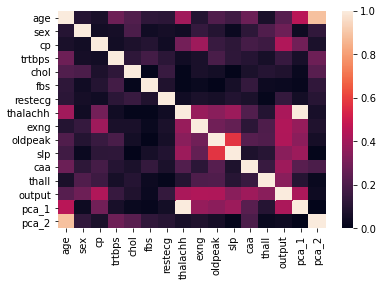

In [50]:
sns.heatmap(abs(df.corr()))

In [51]:
features = ['cp','thalachh', 'exng', 'caa']
train, test = train_test_split(df, train_size=0.8, random_state=2)
train_x = train[features]
train_y = train['output']
test_x = test[features]
test_y = test['output']

scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.fit_transform(test_x)

lr = LinearRegression()
lrm = lr.fit(train_x, train_y)
print('linear regression score: ', lrm.score(train_x, train_y))
print('linear regression test score: ', lrm.score(test_x, test_y))

rf = RandomForestRegressor()
rfm = rf.fit(train_x, train_y)
print('random forest regression score: ', rfm.score(train_x, train_y))
print('random forest regression test score: ', rfm.score(test_x, test_y))

linear regression score:  0.36532203731901647
linear regression test score:  0.5123907599077735
random forest regression score:  0.8248953326715316
random forest regression test score:  0.30589857003287113


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Mean absolute error')
lr_mae = mean_absolute_error(test_y, lrm.predict(test_x))
rf_mae = mean_absolute_error(test_y, rfm.predict(test_x))
print(lr_mae, rf_mae)
print('Mean squared error')
lr_mse = mean_squared_error(test_y, lrm.predict(test_x))
rf_mse = mean_squared_error(test_y, rfm.predict(test_x))
print(lr_mse, rf_mse)
print('R2 score')
lr_r2 = r2_score(test_y, lrm.predict(test_x))
rf_r2 = r2_score(test_y, rfm.predict(test_x))
print(lr_r2, rf_r2)

Mean absolute error
0.2776669043443781 0.28182181889149094
Mean squared error
0.12160746433904493 0.17310565090284752
R2 score
0.5123907599077735 0.30589857003287113


In [53]:
pca = PCA(n_components=2, random_state=1004)
data_pca = pca.fit_transform(df[features])
df['pca_1'] = data_pca[:,0]
df['pca_2'] = data_pca[:,1]
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,pca_1,pca_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,-0.389721,-1.959505
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,-37.370267,-0.639812
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,-22.359387,-0.200636
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,-28.358398,-0.099038
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,-13.339743,0.454471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,26.653662,-0.222851
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,17.607312,-2.264300
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,8.667930,1.390502
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,34.661881,0.353131


In [54]:
train, test = train_test_split(df, train_size=0.8, random_state=2)
train_x = train[['pca_1', 'pca_2']]
train_y = train['output']
test_x = test[['pca_1', 'pca_2']]
test_y = test['output']

lr = LinearRegression()
lrm = lr.fit(train_x, train_y)
print('linear regression score: ', lrm.score(train_x, train_y))
print('linear regression test score: ', lrm.score(test_x, test_y))

rf = RandomForestRegressor()
rfm = rf.fit(train_x, train_y)
print('random forest regression score: ', rfm.score(train_x, train_y))
print('random forest regression test score: ', rfm.score(test_x, test_y))

print('Mean absolute error')
lr_mae = mean_absolute_error(test_y, lrm.predict(test_x))
rf_mae = mean_absolute_error(test_y, rfm.predict(test_x))
print(lr_mae, rf_mae)
print('Mean squared error')
lr_mse = mean_squared_error(test_y, lrm.predict(test_x))
rf_mse = mean_squared_error(test_y, rfm.predict(test_x))
print(lr_mse, rf_mse)
print('R2 score')
lr_r2 = r2_score(test_y, lrm.predict(test_x))
rf_r2 = r2_score(test_y, rfm.predict(test_x))
print(lr_r2, rf_r2)

linear regression score:  0.33758601464229565
linear regression test score:  0.4427773521537467
random forest regression score:  0.8138448631605704
random forest regression test score:  0.38477269324593855
Mean absolute error
0.3104064532731672 0.2844076242518865
Mean squared error
0.13896872270930477 0.15343481340171164
R2 score
0.4427773521537467 0.38477269324593855


# 모델 연습
## 로지스틱 회귀, 랜덤포레스트분류

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
lr = LogisticRegression(random_state=123)
rf = RandomForestClassifier(random_state=123)

pca = PCA(n_components=2, random_state=123)

df = pd.read_csv("../data/heart.csv")
df.head(5)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [80]:
scaler = RobustScaler()
features = df.columns.tolist()
x_data = scaler.fit_transform(df[features[3:-1]])
heart_pca = pca.fit_transform(x_data)

In [81]:
df['pca_1'] = heart_pca[:, 0]
df['pca_2'] = heart_pca[:, 1]
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,pca_1,pca_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.127126,1.309692
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,-0.085869,0.950673
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,-0.990512,0.094689
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,-1.348747,-0.273178
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,-0.817628,0.315132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,-0.087089,0.738744
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,-0.480216,-0.071293
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1.801778,-0.171750
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0.525806,-0.515128


In [82]:
train, test = train_test_split(df, train_size=0.8, random_state=2)
train_x = train[['pca_1', 'pca_2']]
train_y = train['output']
test_x = test[['pca_1', 'pca_2']]
test_y = test['output']
lrm = lr.fit(train_x, train_y)
rfm = rf.fit(train_x, train_y)

print(lrm.score(train_x, train_y), lrm.score(test_x, test_y))
print(rfm.score(train_x, train_y), rfm.score(test_x, test_y))

0.768595041322314 0.8360655737704918
1.0 0.7868852459016393


In [85]:
lr_pred_y = lrm.predict(test_x)
rf_pred_y = rfm.predict(test_x)
print(test_y, lr_pred_y)
print("정확도 : {:.2f}".format(accuracy_score(test_y, lr_pred_y)*100))
print("정확도 : {:.2f}".format(accuracy_score(test_y, rf_pred_y)*100))
print("정밀도 : {:.2f}".format(precision_score(test_y, lr_pred_y)*100))
print("정밀도 : {:.2f}".format(precision_score(test_y, rf_pred_y)*100))
print("재현율 : {:.2f}".format(recall_score(test_y, lr_pred_y)*100))
print("재현율 : {:.2f}".format(recall_score(test_y, rf_pred_y)*100))
print("f1 score : {:.2f}".format(f1_score(test_y, lr_pred_y)*100))
print("f1 score : {:.2f}".format(f1_score(test_y, rf_pred_y)*100))


99     1
296    0
89     1
30     1
234    0
      ..
173    0
94     1
161    1
216    0
91     1
Name: output, Length: 61, dtype: int64 [0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1
 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1]
정확도 : 83.61
정확도 : 78.69
정밀도 : 77.14
정밀도 : 78.57
재현율 : 93.10
재현율 : 75.86
f1 score : 84.38
f1 score : 77.19


# 모델 연습
## KMeans 클러스터링

<AxesSubplot:>

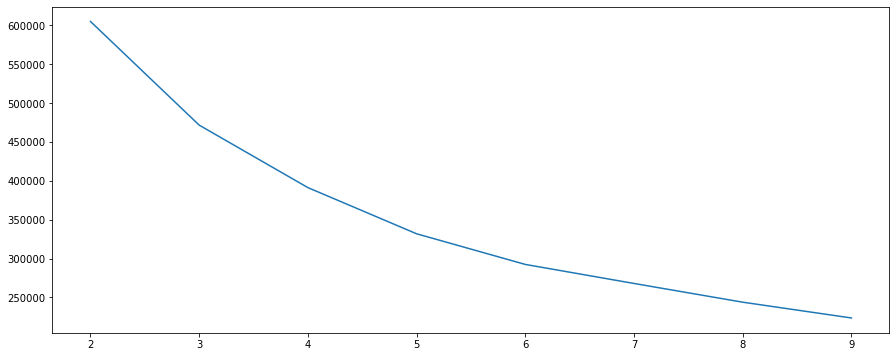

In [89]:
inertias = []
for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=111)
    model.fit(df[features[:-3]])
    inertias.append(model.inertia_)
plt.figure(figsize=(15,6))
sns.lineplot(y=inertias, x= range(2,10))

In [104]:
model = KMeans(n_clusters=5, max_iter=111, random_state=111)
model.fit(df[features[:-3]])
df['labels'] = model.labels_
df.groupby('labels')['output'].describe()

,count,mean,std,min,25%,50%,75%,max
labels,,,,,,,,
0,100.0,0.690000,0.464823,0.0,0.0,1.0,1.0,1.0
1,57.0,0.473684,0.503745,0.0,0.0,0.0,1.0,1.0
2,84.0,0.571429,0.497844,0.0,0.0,1.0,1.0,1.0
3,5.0,0.600000,0.547723,0.0,0.0,1.0,1.0,1.0
4,57.0,0.315789,0.468961,0.0,0.0,0.0,1.0,1.0
